In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as patches
from plotly.offline import iplot

In [36]:
pip install chardet

In [37]:
import chardet

# Detect the encoding of the file
with open('OnlineRetail.csv', 'rb') as f:
  result = chardet.detect(f.read())

# Print the detected encoding
#print(result['encoding'])

# Read the CSV file with the detected encoding
data = pd.read_csv('OnlineRetail.csv', encoding=result['encoding'])


# Exploratory Data Analysis (EDA) and Insights:

Check Data Sumary and Quality:
Examine basic statistics, missing values, and data types.
Ensure data integrity and cleanliness.

In [38]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Cleaning the missing values

*   List item
*   List item


Customer Id type is float converting it to int

In [41]:
data['CustomerID']= data['CustomerID'].astype('Int64')
data = data.dropna()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  Int64  
 7   Country      406829 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 28.3+ MB


In [43]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


# Display the most bought product and its quantity


In [44]:
product_quantities = data.groupby('Description')['Quantity'].sum()

most_bought_product = product_quantities.idxmax()
max_quantity_sold = product_quantities.max()

print("Most Bought Product:", most_bought_product)
print("Quantity Sold:", max_quantity_sold)


Most Bought Product: WORLD WAR 2 GLIDERS ASSTD DESIGNS
Quantity Sold: 53215


In [45]:
unique_countries = data['Country'].unique()

print("Unique Countries:")
print(unique_countries)


Unique Countries:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [46]:
unique_customer_ids = data['CustomerID'].value_counts()
unique_customer_ids

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
15070       1
15753       1
17065       1
16881       1
16995       1
Name: CustomerID, Length: 4372, dtype: Int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
 7   Country      406829 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.3+ MB


In [48]:
data['TotalRevenue']= data['Quantity']*data['UnitPrice']

#Top Customers by Total Revenue:


In [49]:
top_customers = data.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False)
print("Top Customers by Total Revenue:")
print(top_customers.head(10))

Top Customers by Total Revenue:
CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
14156    113384.14
17511     88125.38
16684     65892.08
13694     62653.10
15311     59419.34
Name: TotalRevenue, dtype: float64


# Display country-wise revenue


In [50]:
country_wise_revenue = data.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)

print("Country-wise Revenue:")
print(country_wise_revenue)


Country-wise Revenue:
Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.47

# Find the top 5 products in the United Kingdom


In [51]:
uk_df = data[data['Country'] == 'United Kingdom'] # Can change and see the county accordingly

uk_product_quantities = uk_df.groupby('Description')['Quantity'].sum()

top_5_products_uk = uk_product_quantities.nlargest(5)

print("Top 5 Products in the United Kingdom:")
print(top_5_products_uk)


Top 5 Products in the United Kingdom:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     47982
JUMBO BAG RED RETROSPOT               40880
ASSORTED COLOUR BIRD ORNAMENT         32679
WHITE HANGING HEART T-LIGHT HOLDER    32097
POPCORN HOLDER                        28562
Name: Quantity, dtype: int64


# Display the top 5 frequently bought products and their quantities


In [52]:
product_quantities = data.groupby('Description')['Quantity'].sum()

top_frequent_products = product_quantities.nlargest(5)

print("Top 5 Frequently Bought Products:")
print(top_frequent_products)


Top 5 Frequently Bought Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
Name: Quantity, dtype: int64


# Display the most repeated StockCode and its Description along with the count


In [53]:
# Group by StockCode and Description, then count the occurrences
stockcode_description_counts = data.groupby(['StockCode', 'Description','Country']).size().reset_index(name='Count')

most_repeated_row = stockcode_description_counts.loc[stockcode_description_counts['Count'].idxmax()]
top_5_repeated_stockcodes = stockcode_description_counts.nlargest(5, 'Count')

print("Most Repeated StockCode:", most_repeated_row['StockCode'])
print("Description:", most_repeated_row['Description'])
print("Count:", most_repeated_row['Count'])


Most Repeated StockCode: 85123A
Description: WHITE HANGING HEART T-LIGHT HOLDER
Count: 1980


#Top 5 Repeated Products for Each Country

In [54]:
country_product_counts = data.groupby(['Country', 'StockCode', 'Description']).size().reset_index(name='Count')

country_product_counts = country_product_counts.sort_values(by=['Country', 'Count'], ascending=[True, False])

top_5_repeated_products_by_country = country_product_counts.groupby('Country').head(5)

print("Top 5 Repeated Products for Each Country:")
print(top_5_repeated_products_by_country)
top_5_repeated_products_by_country

Top 5 Repeated Products for Each Country:
           Country StockCode                        Description  Count
298      Australia     22720  SET OF 3 CAKE TINS PANTRY DESIGN      10
13       Australia     20725            LUNCH BAG RED RETROSPOT      9
90       Australia     21731      RED TOADSTOOL LED NIGHT LIGHT      9
150      Australia     22090            PAPER BUNTING RETROSPOT      8
158      Australia     22138      BAKING SET 9 PIECE RETROSPOT       8
...            ...       ...                                ...    ...
19215  Unspecified     21591       COSY HOUR CIGAR BOX MATCHES       3
19323  Unspecified     23108         SET OF 10 LED DOLLY LIGHTS      3
19387  Unspecified     84879      ASSORTED COLOUR BIRD ORNAMENT      3
19190  Unspecified     20679              EDWARDIAN PARASOL RED      2
19198  Unspecified     21065             BOOM BOX SPEAKER GIRLS      2

[185 rows x 4 columns]


,Country,StockCode,Description,Count
298,Australia,22720,SET OF 3 CAKE TINS PANTRY DESIGN,10
13,Australia,20725,LUNCH BAG RED RETROSPOT,9
90,Australia,21731,RED TOADSTOOL LED NIGHT LIGHT,9
150,Australia,22090,PAPER BUNTING RETROSPOT,8
158,Australia,22138,BAKING SET 9 PIECE RETROSPOT,8
...,...,...,...,...
19215,Unspecified,21591,COSY HOUR CIGAR BOX MATCHES,3
19323,Unspecified,23108,SET OF 10 LED DOLLY LIGHTS,3
19387,Unspecified,84879,ASSORTED COLOUR BIRD ORNAMENT,3
19190,Unspecified,20679,EDWARDIAN PARASOL RED,2


In [55]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Top Customer by Recency(latest Purchases made), Frequency(How often they shop) and Money i.e revenue (how much they spend)

In [56]:
customer_info = data.groupby('CustomerID').agg({
    'InvoiceDate': ['count', 'max'],
    'TotalRevenue': 'sum'
})

customer_info.columns = ['PurchaseFrequency', 'LastPurchaseDate', 'TotalRevenue']

customer_info['Recency'] = (data['InvoiceDate'].max() - customer_info['LastPurchaseDate']).dt.days

print("\nTop Customers by Purchase Frequency:")
print(customer_info.sort_values(by='PurchaseFrequency', ascending=False).head(10))

print("\nTop Customers by Recency:")
print(customer_info.sort_values(by='Recency').head(10))

print("\nTop Customers by Total Revenue:")
print(customer_info.sort_values(by='TotalRevenue', ascending=False).head(10))




Top Customers by Purchase Frequency:
            PurchaseFrequency    LastPurchaseDate  TotalRevenue  Recency
CustomerID                                                              
17841                    7983 2011-12-08 12:07:00      40340.78        1
14911                    5903 2011-12-08 15:54:00     132572.62        0
14096                    5128 2011-12-05 17:17:00      57120.91        3
12748                    4642 2011-12-09 12:20:00      29072.10        0
14606                    2782 2011-12-08 19:28:00      11713.85        0
15311                    2491 2011-12-09 12:00:00      59419.34        0
14646                    2085 2011-12-08 12:12:00     279489.02        1
13089                    1857 2011-12-07 09:02:00      57385.88        2
13263                    1677 2011-12-08 13:59:00       7454.07        0
14298                    1640 2011-12-06 15:04:00      50862.44        2

Top Customers by Recency:
            PurchaseFrequency    LastPurchaseDate  TotalRev

In [57]:
customer_info.head()

,PurchaseFrequency,LastPurchaseDate,TotalRevenue,Recency
CustomerID,,,,
12346,2,2011-01-18 10:17:00,0.00,325
12347,182,2011-12-07 15:52:00,4310.00,1
12348,31,2011-09-25 13:13:00,1797.24,74
12349,73,2011-11-21 09:51:00,1757.55,18
12350,17,2011-02-02 16:01:00,334.40,309


Segmenting Customers:
# Assign RFM scores based on bins


In [58]:
recency_bins = [0, 30, 60, 90, 120, 180, 365]
frequency_bins = [1, 5, 10, 20, 50, 100, 1000]
monetary_bins = [0, 100, 500, 1000, 5000, 10000, 50000]

customer_info['RecencyScore'] = pd.cut(customer_info['Recency'], bins=recency_bins, labels=[5, 4, 3, 2, 1, 0], right=False)
customer_info['FrequencyScore'] = pd.cut(customer_info['PurchaseFrequency'], bins=frequency_bins, labels=[0, 1, 2, 3, 4, 5], right=False)
customer_info['MonetaryScore'] = pd.cut(customer_info['TotalRevenue'], bins=monetary_bins, labels=[0, 1, 2, 3, 4, 5], right=False)

customer_info['RFMSegment'] = customer_info['RecencyScore'].astype(str) + customer_info['FrequencyScore'].astype(str) + customer_info['MonetaryScore'].astype(str)

print("\nTop Customer Segments:")
print(customer_info.groupby('RFMSegment').size().sort_values(ascending=False).head(10))



Top Customer Segments:
RFMSegment
553    467
543    222
031    180
021    176
532    135
453    134
531    130
554    113
521    102
011    101
dtype: int64


In [59]:
customer_info.head()

,PurchaseFrequency,LastPurchaseDate,TotalRevenue,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFMSegment
CustomerID,,,,,,,,
12346,2,2011-01-18 10:17:00,0.00,325,0,0,0,000
12347,182,2011-12-07 15:52:00,4310.00,1,5,5,3,553
12348,31,2011-09-25 13:13:00,1797.24,74,3,3,3,333
12349,73,2011-11-21 09:51:00,1757.55,18,5,4,3,543
12350,17,2011-02-02 16:01:00,334.40,309,0,2,1,021


In [60]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PurchaseFrequency  4372 non-null   int64         
 1   LastPurchaseDate   4372 non-null   datetime64[ns]
 2   TotalRevenue       4372 non-null   float64       
 3   Recency            4372 non-null   int64         
 4   RecencyScore       4305 non-null   category      
 5   FrequencyScore     4350 non-null   category      
 6   MonetaryScore      4312 non-null   category      
 7   RFMSegment         4372 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 222.7+ KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

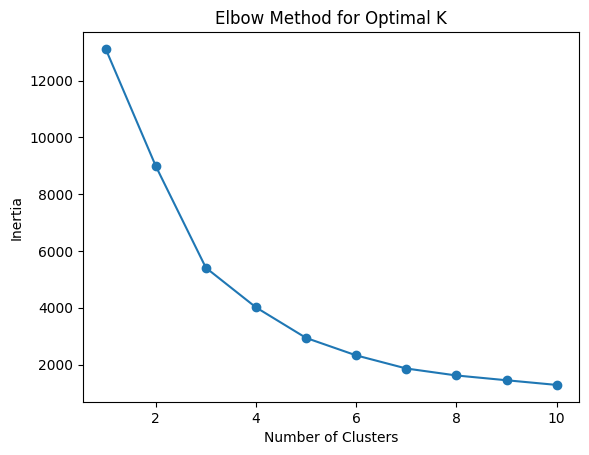

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Customer Distribution in Clusters:
0    3264
1    1096
2      12
Name: Cluster, dtype: int64

Cluster Characteristics:
         PurchaseFrequency   TotalRevenue     Recency
Cluster                                              
0               104.874694    1950.597005   39.254289
1                27.710766     464.197911  246.244526
2              2845.583333  118713.023333    4.000000


<ipython-input-61-b92167f40150>:29: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = customer_info[['Recency', 'PurchaseFrequency', 'TotalRevenue']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_info['Cluster'] = kmeans.fit_predict(scaled_features)

cluster_distribution = customer_info['Cluster'].value_counts().sort_index()
print("\nCustomer Distribution in Clusters:")
print(cluster_distribution)

cluster_means = customer_info.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_means)

In [62]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, customer_info['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.6003883114752382


In [69]:
print(f"Inertia: {kmeans.inertia_}")


Inertia: 5408.410191085488


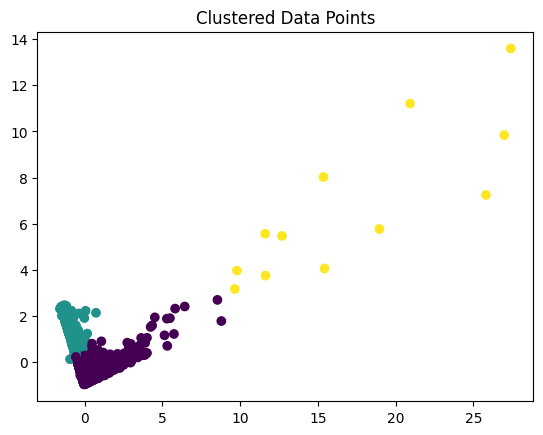

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=customer_info['Cluster'], cmap='viridis')
plt.title('Clustered Data Points')
plt.show()


#Customer Clusters based on Purchase Frequency and Total Revenue

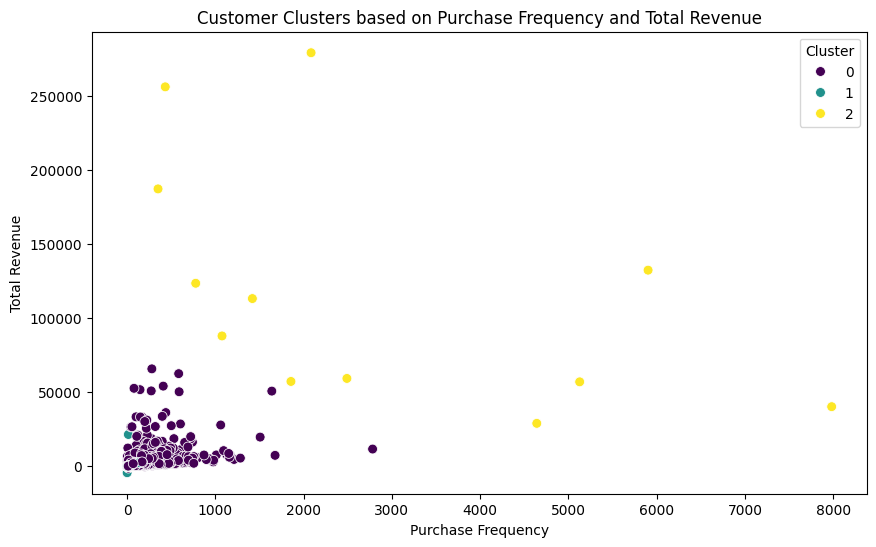

In [63]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PurchaseFrequency', y='TotalRevenue', hue='Cluster', data=customer_info, palette='viridis', s=50)
plt.title('Customer Clusters based on Purchase Frequency and Total Revenue')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Revenue')
plt.legend(title='Cluster')
plt.show()


In [64]:
customer_info.head()

,PurchaseFrequency,LastPurchaseDate,TotalRevenue,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFMSegment,Cluster
CustomerID,,,,,,,,,
12346,2,2011-01-18 10:17:00,0.00,325,0,0,0,000,1
12347,182,2011-12-07 15:52:00,4310.00,1,5,5,3,553,0
12348,31,2011-09-25 13:13:00,1797.24,74,3,3,3,333,0
12349,73,2011-11-21 09:51:00,1757.55,18,5,4,3,543,0
12350,17,2011-02-02 16:01:00,334.40,309,0,2,1,021,1


# Analyze cluster characteristics


<ipython-input-65-fb360e9ed85d>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.




Cluster Characteristics:
         PurchaseFrequency   TotalRevenue     Recency
Cluster                                              
0               104.874694    1950.597005   39.254289
1                27.710766     464.197911  246.244526
2              2845.583333  118713.023333    4.000000


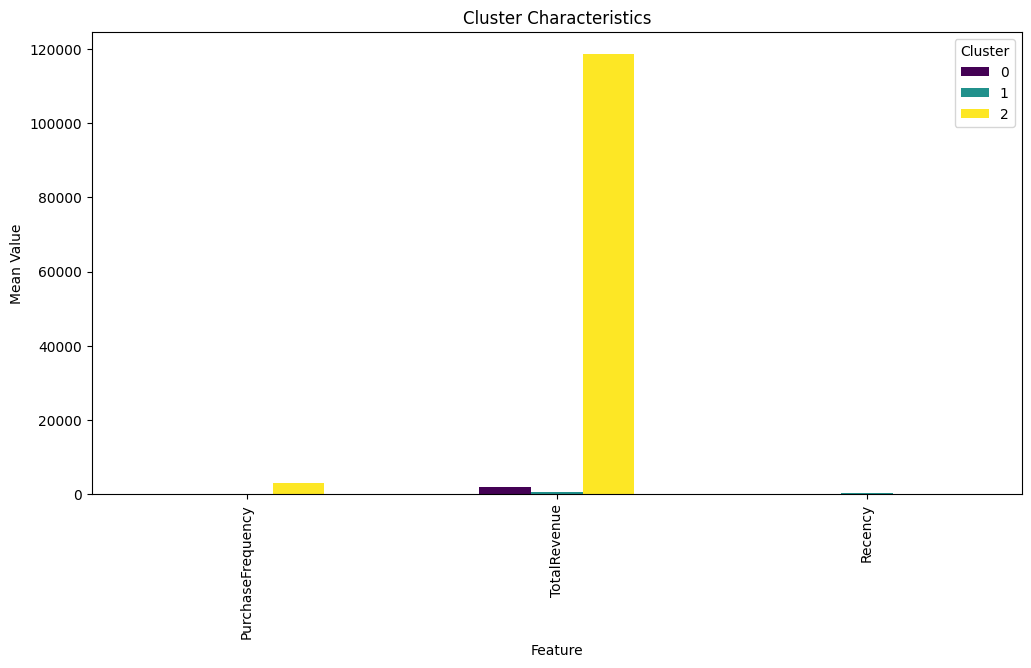

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_means = customer_info.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_means)

# Plot cluster characteristics using a bar plot
cluster_means.transpose().plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Cluster Characteristics')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.legend(title='Cluster', loc='upper right')
plt.show()


#Which segment of customers have contibuted to the revenue the most

<Axes: xlabel='Cluster', ylabel='TotalRevenue'>

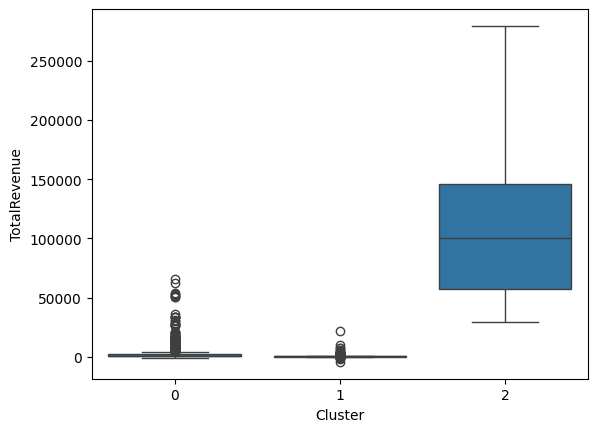

In [66]:
sns.boxplot(x='Cluster',y = 'TotalRevenue',data = customer_info)

#Which Segment is buying products frequently

<Axes: xlabel='Cluster', ylabel='PurchaseFrequency'>

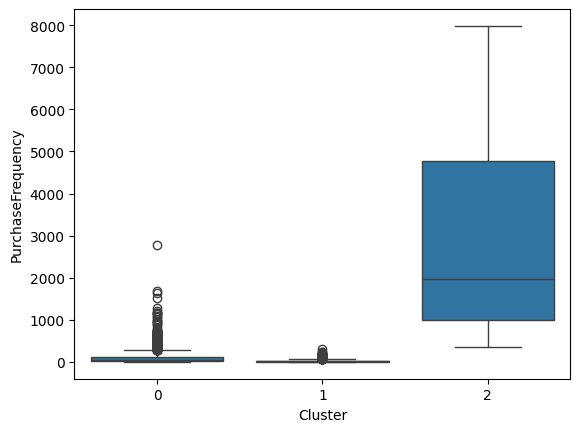

In [67]:
sns.boxplot(x='Cluster',y = 'PurchaseFrequency',data = customer_info)

#Which Segment of Customer have done purchases recently

<Axes: xlabel='Cluster', ylabel='Recency'>

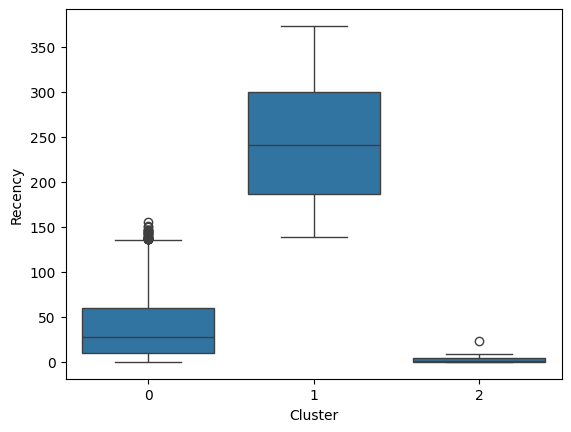

In [68]:
sns.boxplot(x='Cluster',y = 'Recency',data = customer_info)